# MayaSim quickstart tutorial

created by Fritz Kühlein, 28/08/2024

## 1. Run MayaSim

and plot some aggregate state variables

- 500 time step runs take around 15-30 minutes
- 2000 time step runs take around 60-90 minutes

In [1]:
import matplotlib.pyplot as plt

from mayasim.model.core import Core as MayaSim

### run MayaSim according to Kolb ([2020](https://doi.org/10.18452/22147)) (default):

In [6]:
model = MayaSim()
model.run(500)

running MayaSim:   0%|          | 0/500 [00:00<?, ?it/s, population=44598.0]

(0.0, 500.0)

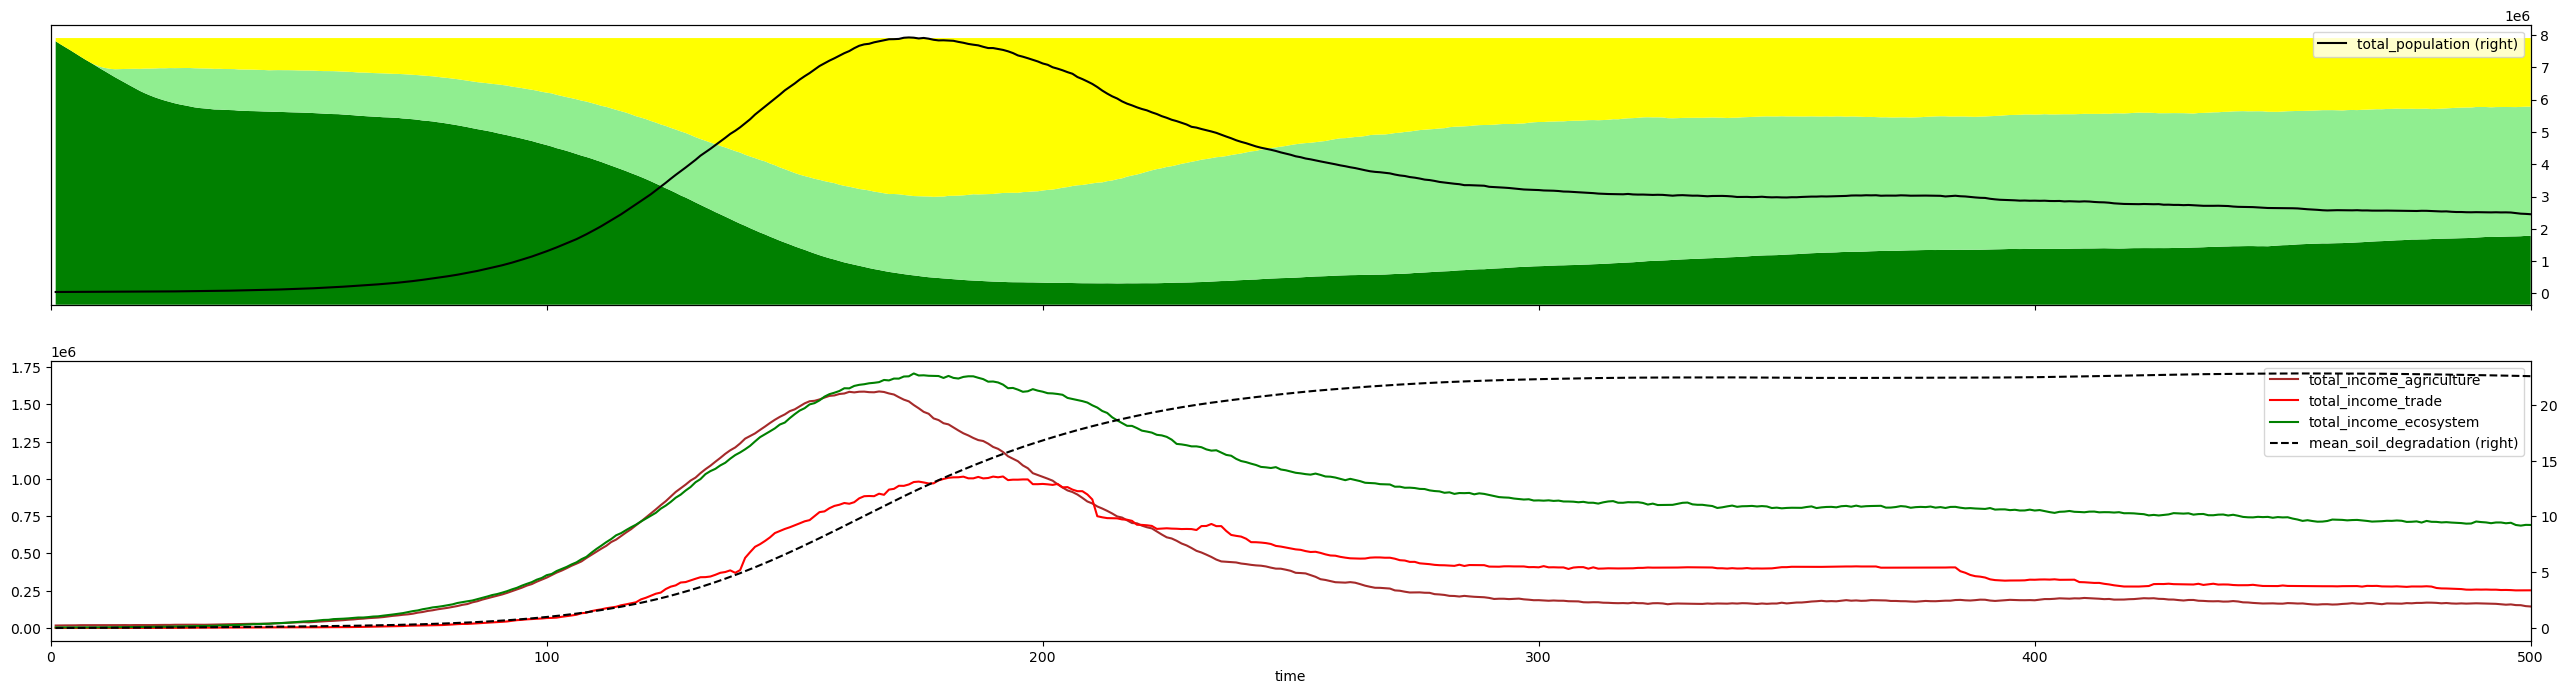

In [7]:
data = model.get_aggregates()

# plot aggregate trajectory
fig, axes = plt.subplots(nrows=2, figsize=(16, 4), sharex=True)

# forest state
axes[0].stackplot(data['time'], data['forest_state_3_cells'], data['forest_state_2_cells'], data['forest_state_1_cells'], colors=['green', 'lightgreen', 'yellow'])

# population
data.plot('time', y='total_population', color='k', ax=axes[0], secondary_y=True)

# income
data.plot('time', y='total_income_agriculture', color='brown', ax=axes[1])
data.plot('time', y='total_income_trade', color='red', ax=axes[1])
data.plot('time', y='total_income_ecosystem', color='green', ax=axes[1])

# soil degradation
data.plot('time', y='mean_soil_degradation', ls='--', color='k', ax=axes[1], secondary_y=True)

axes[1].set_xlim(0, 500)

### run MayaSim without adapted ecosystem service calculation

adaptation was introduced as of Kolb ([2020](https://doi.org/10.18452/22147))

In [8]:
model = MayaSim()
model.better_ess = False
model.run(500)

running MayaSim:   0%|          | 0/500 [00:00<?, ?it/s, population=43467.0]

(0.0, 500.0)

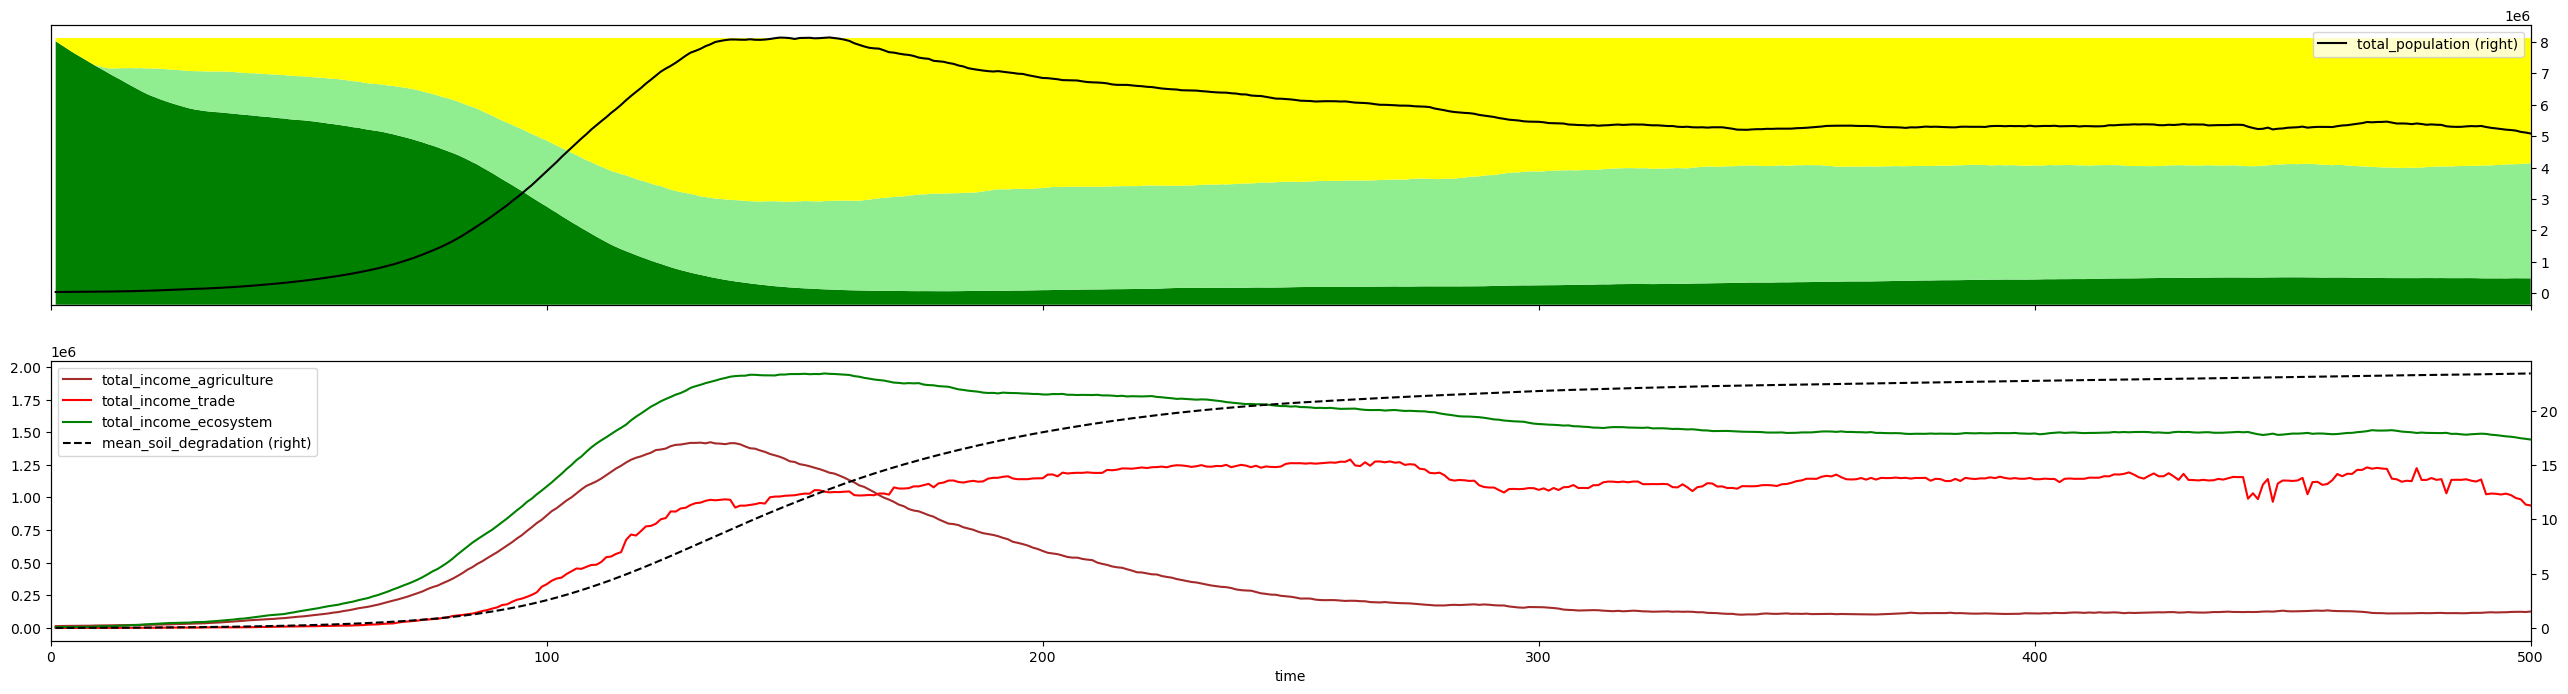

In [9]:
data = model.get_aggregates()

# plot aggregate trajectory
fig, axes = plt.subplots(nrows=2, figsize=(16, 4), sharex=True)

# forest state
axes[0].stackplot(data['time'], data['forest_state_3_cells'], data['forest_state_2_cells'], data['forest_state_1_cells'], colors=['green', 'lightgreen', 'yellow'])

# population
data.plot('time', y='total_population', color='k', ax=axes[0], secondary_y=True)

# income
data.plot('time', y='total_income_agriculture', color='brown', ax=axes[1])
data.plot('time', y='total_income_trade', color='red', ax=axes[1])
data.plot('time', y='total_income_ecosystem', color='green', ax=axes[1])

# soil degradation
data.plot('time', y='mean_soil_degradation', ls='--', color='k', ax=axes[1], secondary_y=True)

axes[1].set_xlim(0, 500)

### run MayaSim set according to Heckbert ([2013](https://doi.org/10.18564/jasss.2305)):

In [14]:
model = MayaSim()
model.precip_modulation = True
model.better_ess = False
model.kill_stm_without_crops = True
model.crop_income_mode = 'mean'
model.eco_income_mode = 'mean'

# model.a_wf = 400        # instead of 4 - different units?
model.e_ag = 0.06       # instead of 0.05
# model.e_wf = 40         # instead of 1 - different units?

model.run(500)

running MayaSim:   0%|          | 0/500 [00:00<?, ?it/s, population=45183.0]

/Users/fritz/Desktop/Thesis/MayaSim/mayasim/model/core.py:825: RuntimeWarning: Mean of empty slice
  * np.nanmean(bca[bca > 0])


(0.0, 500.0)

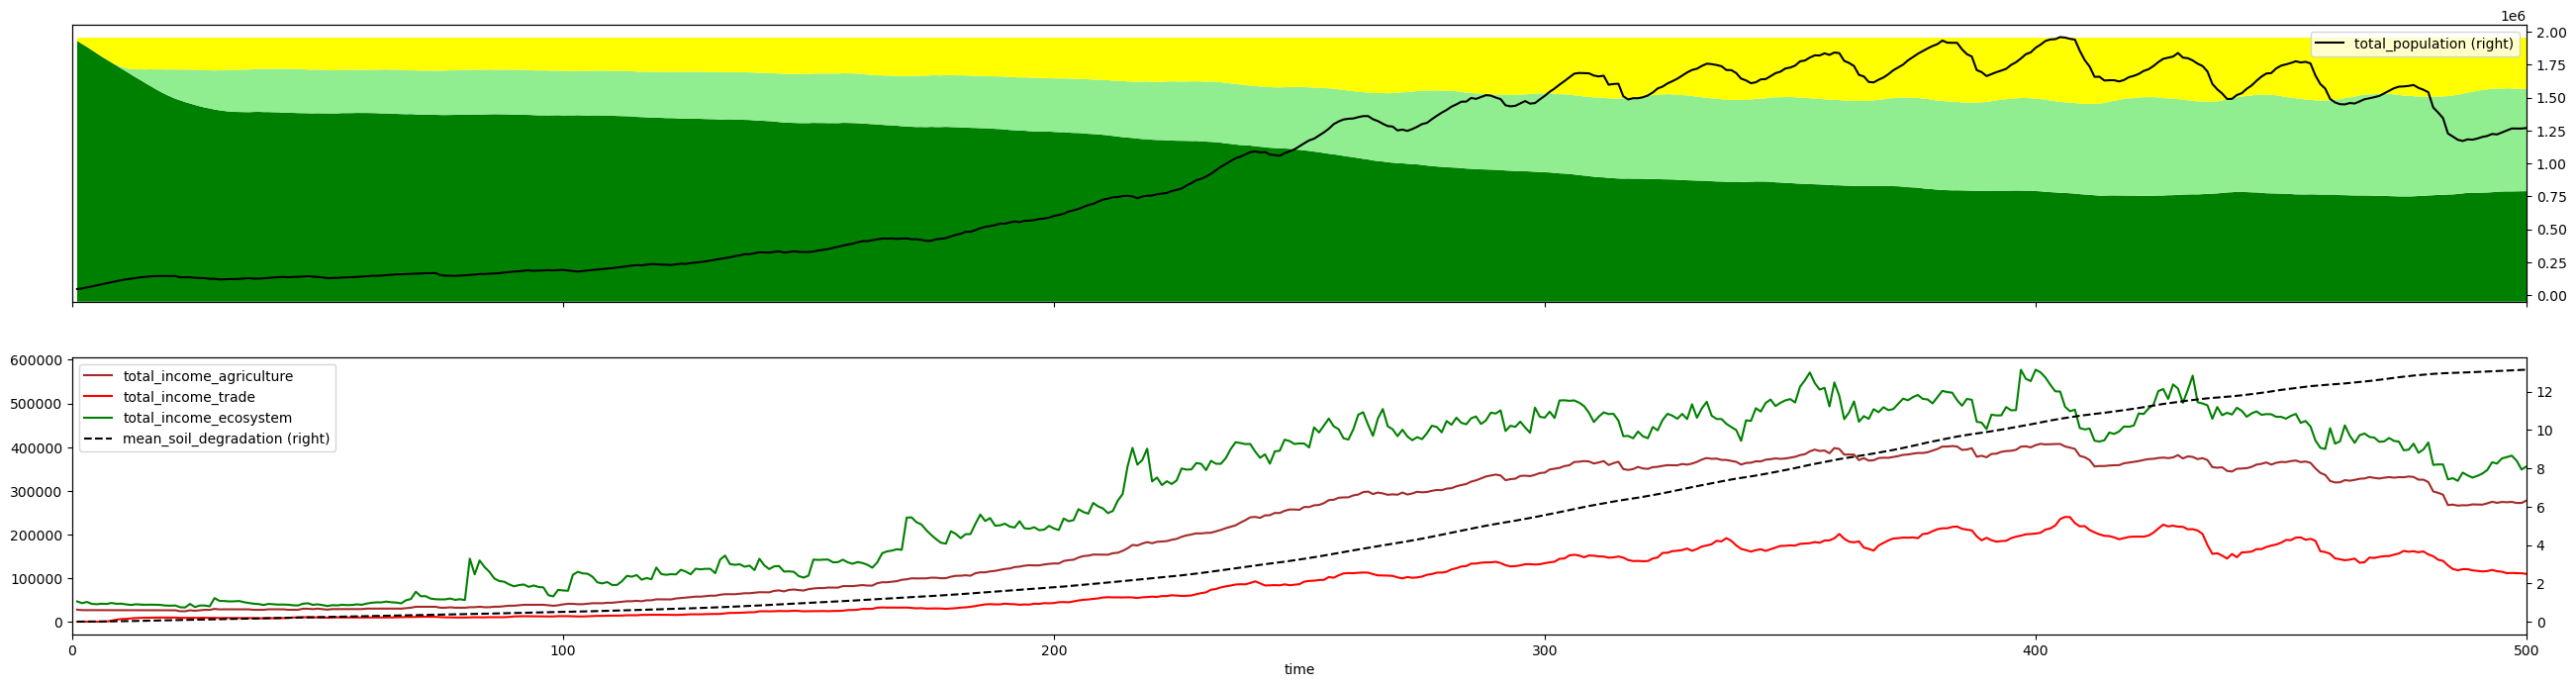

In [15]:
data = model.get_aggregates()

# plot aggregate trajectory
fig, axes = plt.subplots(nrows=2, figsize=(32, 8), sharex=True)

# forest state
axes[0].stackplot(data['time'], data['forest_state_3_cells'], data['forest_state_2_cells'], data['forest_state_1_cells'], colors=['green', 'lightgreen', 'yellow'])

# population
data.plot('time', y='total_population', color='k', ax=axes[0], secondary_y=True)

# income
data.plot('time', y='total_income_agriculture', color='brown', ax=axes[1])
data.plot('time', y='total_income_trade', color='red', ax=axes[1])
data.plot('time', y='total_income_ecosystem', color='green', ax=axes[1])

# soil degradation
data.plot('time', y='mean_soil_degradation', ls='--', color='k', ax=axes[1], secondary_y=True)

axes[1].set_xlim(0, 500)

### run MayaSim with custom specification of income weight parameters:

_This setting balances income from all three sources while allowing for human-nature coexistence (ecosystem will partially recover after initial overshoot)._

In [ ]:
model = MayaSim()
model.r_bca_sum = 0.225
model.r_es_sum = 0.03
model.r_tr_sum = 4000
model.run(500)

running MayaSim:   0%|          | 0/500 [00:00<?, ?it/s, population=45746.0]

(0.0, 500.0)

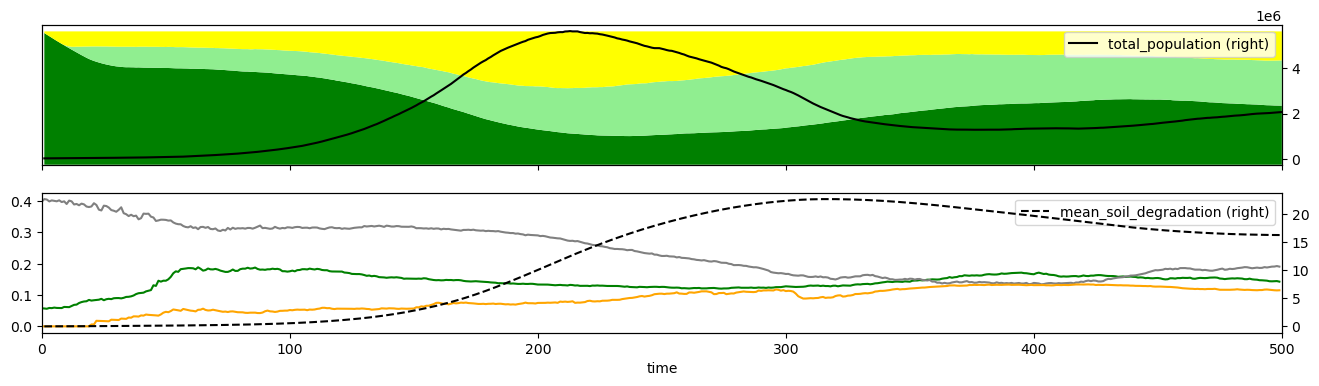

In [14]:
data = model.get_aggregates()

# plot aggregate trajectory
fig, axes = plt.subplots(nrows=2, figsize=(16, 4), sharex=True)

# forest state
axes[0].stackplot(data['time'], data['forest_state_3_cells'], data['forest_state_2_cells'], data['forest_state_1_cells'], colors=['green', 'lightgreen', 'yellow'])

# population
data.plot('time', y='total_population', color='k', ax=axes[0], secondary_y=True)

# p.c. income
es_income_pc = data['total_income_ecosystem']/data['total_population']
es_income_pc.plot(label='total p.c. ecosystem services income $Y_{ES}/P$', color='green', ax=axes[1])
ag_income_pc = data['total_income_agriculture']/data['total_population']
ag_income_pc.plot(label='total p.c. agricultural income $Y_{AG}/P$', color='grey', ax=axes[1])
tr_income_pc = data['total_income_trade']/data['total_population']
tr_income_pc.plot(label='total p.c. trade income $Y_{TR}/P$', color='orange', ax=axes[1])

# income
# data.plot('time', y='total_income_agriculture', color='brown', ax=axes[1])
# data.plot('time', y='total_income_trade', color='red', ax=axes[1])
# data.plot('time', y='total_income_ecosystem', color='green', ax=axes[1])

# soil degradation
data.plot('time', y='mean_soil_degradation', ls='--', color='k', ax=axes[1], secondary_y=True)

axes[1].set_xlim(0, 500)

## 2. Inspect spatially resolved cell state variables

Forest state

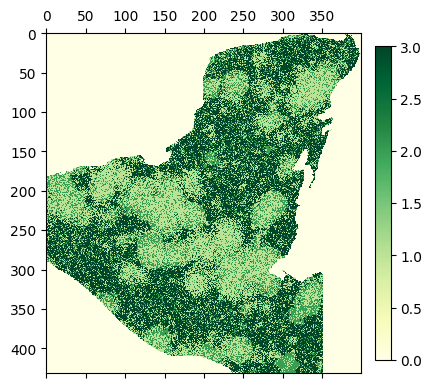

In [7]:
plt.matshow(model.cel_forest_state, cmap='YlGn')
plt.colorbar(fraction=0.0455, pad=0.04)

Water Flow

In [ ]:
from matplotlib.colors import LogNorm

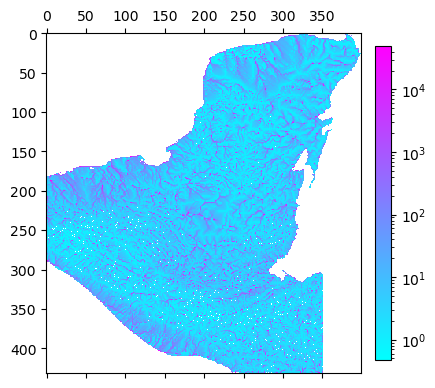

In [15]:
plt.matshow(model.cel_waterflow, norm=LogNorm() , cmap='cool')
plt.colorbar(fraction=0.0455, pad=0.04)

Ecosystem Services Provision

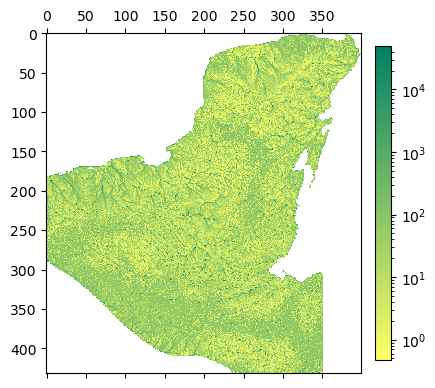

In [7]:
plt.matshow((
    model.cel_es_ag
    + model.cel_es_wf
    + model.cel_es_fs
    + model.cel_es_sp
    - model.cel_es_pg), norm=LogNorm(), cmap='summer_r')
plt.colorbar(fraction=0.0455, pad=0.04)

## 3. Run Pre-designed experiment scripts

__Note:__ Needs `pymofa` installed from <https://github.com/fkuehlein/pymofa/tree/results_pkl>. `pymofa` will handle parallelization and only run experiments if output files do not already exist.

In [14]:
from MayaSim.experiments import X1_aggregate_dynamics as X1

X1.run_experiment(test=True, mode=0, job_id=0, max_id=0)

r_trade: [6000, 7000]
r_es: [0.03, 0.08]
parameter combinations: 4, samples: 4
initializing pymofa experiment handle
detected 1 nodes in MPI environment
0 of 16 single computations left
Only one node available. No parallel execution.
Splitting calculations to 0 nodes.
Calculating 0 ...done.


1

## 4. Profile MayaSim's performance:

using Python's own profiler `cProfile`.

speedup from Python MayaSim [v1.2.0](https://github.com/pik-copan/MayaSim/tree/v1.2) to [v1.3.0](https://github.com/pik-copan/MayaSim/tree/v1.3.0):

In [10]:
print(round(30.14/2.17, 2), 'times faster')

13.89 times faster


In [9]:
print(round(100 - (2.17/30.14) * 100, 2), '% speed-up')

92.8 % speed-up


### Python MayaSim v1.3.0

350 time steps: h 00:12:40 (2.17 s/it)

In [19]:
(12*60+40)/350

2.1714285714285713

In [17]:
import cProfile

model = MayaSim()

cProfile.run('model.run(steps=350)', sort='tottime')

running MayaSim:   0%|          | 0/350 [00:00<?, ?it/s, population=42449.0]

         26929914 function calls (26926564 primitive calls) in 760.281 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    25674  127.166    0.005  127.207    0.005 function_base.py:5562(append)
  1816025  101.877    0.000  101.877    0.000 {built-in method numpy.array}
      350   77.684    0.222  198.145    0.566 core.py:479(update_cropped_cells)
      350   62.288    0.178   97.382    0.278 core.py:673(update_pop_gradient)
      350   40.068    0.114   69.752    0.199 core.py:444(update_influenced_cells)
     8558   33.480    0.004  160.609    0.019 core.py:987(spawn_settlement)
   449180   28.091    0.000   28.091    0.000 {built-in method builtins.sorted}
      350   28.030    0.080  193.528    0.553 core.py:887(migration)
      350   26.752    0.076   26.752    0.076 core.py:439(benefit_cost)
     1050   25.418    0.024   25.418    0.024 {method 'nonzero' of 'numpy.ndarray' objects}
   301874   25.111    0.000   25.11

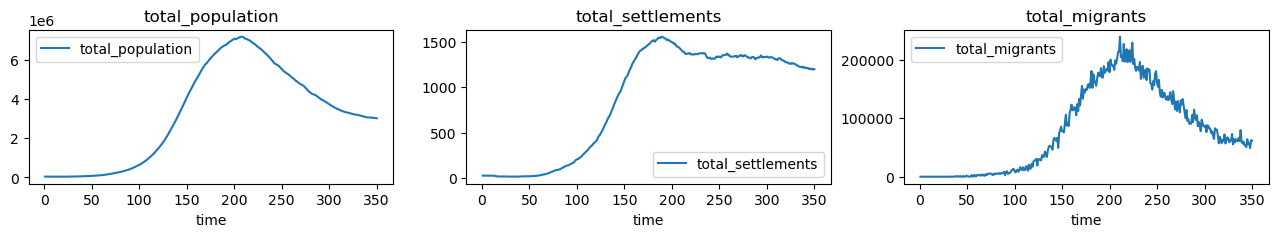

In [18]:
# get aggregate trajectory
aggregate_trj = model.get_aggregates()
measures = [
    'time',
    'total_population',
    'total_settlements',
    'total_migrants',
]
# plot selected aggregates
fig, axes = plt.subplots(ncols=len(measures)-1, figsize=(16, 2))
for i, meas in enumerate(measures[1:]):
    aggregate_trj.plot('time', y=meas, ax=axes[i], title=meas)

### Python MayaSim v1.2.0

Note: This was run with MayaSim at [`7efa4d6`](https://github.com/fkuehlein/MayaSim/tree/7efa4d68a0952fc1e503b96dcca6333c4e8be557), which corresponds to [Python MayaSim v1.2.0](https://github.com/pik-copan/MayaSim/tree/v1.2) with only functional fixes.

350 time steps: h 02:55:50 (30.14 s/it)

In [21]:
(2*60*60+55*60+50)/350

30.142857142857142

  0%|          | 0/350 [00:00<?, ?it/s]

         211484247 function calls (211480182 primitive calls) in 10551.182 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   260195 2212.592    0.009 2212.592    0.009 ModelCore.py:613(<listcomp>)
      350 1933.421    5.524 4117.931   11.766 ModelCore.py:986(get_eco_income)
      350 1219.905    3.485 1505.640    4.302 ModelCore.py:394(forest_evolve)
  1914704 1059.129    0.001 1059.129    0.001 {built-in method numpy.array}
      350  925.861    2.645  926.279    2.647 ModelCore.py:527(get_cells_in_influence)
      350  920.560    2.630  920.644    2.630 ModelCore.py:794(update_pop_gradient)
  1903155  738.408    0.000 1801.223    0.001 nanfunctions.py:68(_replace_nan)
  6745997  393.050    0.000  393.050    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      350  318.307    0.909  397.879    1.137 ModelCore.py:1045(migration)
141232000  209.560    0.000  209.560    0.000 {method 'random' of 'numpy.random.mtrand.Rando

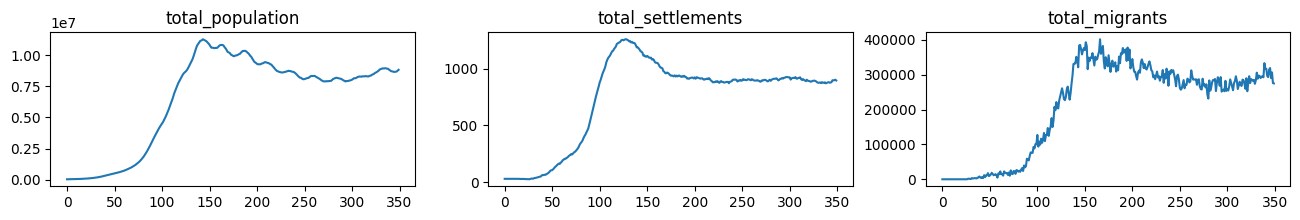

In [2]:
import cProfile

model = MayaSim()

cProfile.run('model.run(t_max=350)', sort='tottime')

trj = model.get_trajectory()

measures = [
    'time',
    'total_population', 
    'total_settlements', 
    'total_migrants'
    ]

fig, axes = plt.subplots(ncols=len(measures)-1, figsize=(16, 2))
for i, meas in enumerate(measures[1:]):
    trj.plot('time', y=meas, ax=axes[i], title=meas)